In [1]:
import pandas as pd, numpy as np, scipy as sp, seaborn as sb


In [2]:
import statsmodels.api as sm

In [3]:
data_reg_mult = pd.read_csv('kc_house_data.csv')

In [5]:
data_reg_mult.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
subdata=data_reg_mult[['price','bedrooms','sqft_living','grade','view','sqft_lot']]

In [7]:
subdata


,price,bedrooms,sqft_living,grade,view,sqft_lot
0,221900.0,3,1180,7,0,5650
1,538000.0,3,2570,7,0,7242
2,180000.0,2,770,6,0,10000
3,604000.0,4,1960,7,0,5000
4,510000.0,3,1680,8,0,8080
5,1225000.0,4,5420,11,0,101930
6,257500.0,3,1715,7,0,6819
7,291850.0,3,1060,7,0,9711
8,229500.0,3,1780,7,0,7470
9,323000.0,3,1890,7,0,6560


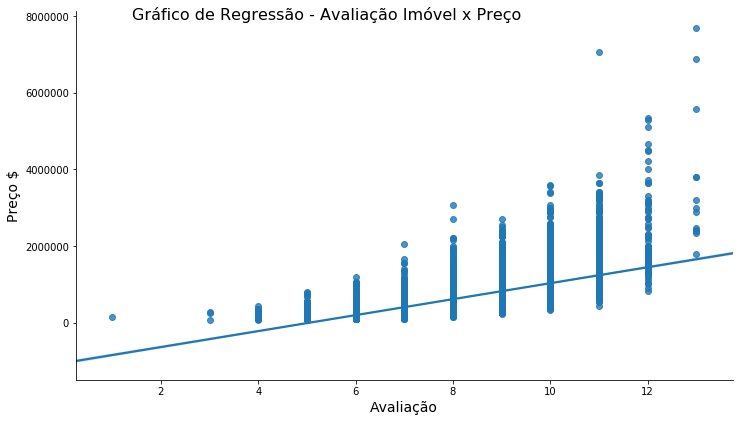

In [8]:
ax = sb.lmplot(x='grade', y = 'price', data = subdata)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - Avaliação Imóvel x Preço', fontsize = 16)
ax.set_xlabels('Avaliação', fontsize = 14)
ax.set_ylabels('Preço $', fontsize = 14)
ax

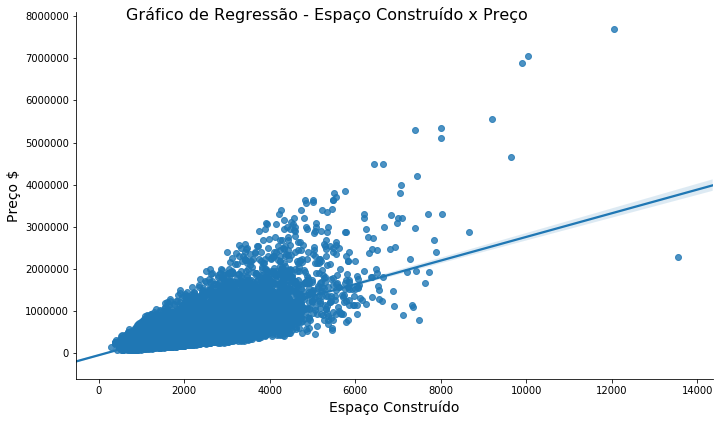

In [10]:
ax = sb.lmplot(x='sqft_living', y = 'price', data = subdata)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - Espaço Construído x Preço', fontsize = 16)
ax.set_xlabels('Espaço Construído', fontsize = 14)
ax.set_ylabels('Preço $', fontsize = 14)
ax

In [ ]:
ax = sb.lmplot(x='bedrooms', y = 'price', data = subdata)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Gráfico de Regressão - Quant. Quartos x Preço', fontsize = 16)
ax.set_xlabels('Quantidade Quartos', fontsize = 14)
ax.set_ylabels('Preço $', fontsize = 14)
ax